# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it.

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16).
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [ ]:
import random

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self.create_deck()
        self.plastic_card_position = random.randint(0, len(self.cards) - 1)
        self.shuffle()

    def create_deck(self):
        """Create a list of cards using the specified number of 52-card decks."""
        deck = [Card(suit, rank) for suit in self.suits for rank in self.ranks]
        return deck * self.num_decks

    def shuffle(self):
        """Shuffle the deck."""
        random.shuffle(self.cards)

    def draw(self):
        """Draw the top card from the deck. If the plastic card is reached, reshuffle the deck."""
        if len(self.cards) == 0:
            raise ValueError("The deck is empty.")

        top_card = self.cards.pop(0)

        # Check if the plastic card is drawn
        if len(self.cards) == self.plastic_card_position:
            print("Plastic card reached, reshuffling the deck.")
            self.cards = self.create_deck()
            self.shuffle()

        return top_card

deck = Deck(num_decks=6)

# Draw a few cards
for _ in range(5):
    print(deck.draw())


5 of Spades
Q of Spades
K of Hearts
6 of Diamonds
9 of Clubs


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook.

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [ ]:
class Card:

    def __init__(self):
        pass

    def reveal(self):
        pass

    def __repr__(self):
        pass

class Deck:

    ranks = []
    suits = []

    def __init__(self):
        pass  # Added pass statement for empty block

    def create_deck(self):
        pass  # Added pass statement for empty block

    def shuffle(self):
        pass  # Added pass statement for empty block

    def draw_card(self):
        pass  # Added pass statement for empty block

class Hand:

    def __init__(self):  # Added parentheses and pass statement
        pass

    def add_card(self, card):
        pass  # Added pass statement for empty block

    def hand_value(self):
        pass
    def is_bust(self):
        pass

class Player:

    def __init__(self):  # Added parentheses and pass statement
        pass

    def draw_card(self, deck):
        pass

    def decide(self):
        pass

class BlackjackGame:

    def __init__(self):
        pass

    def initial_deal(self):
        pass

    def play_round(self):
        pass

    def determine_winners(self):
        pass

    def reset(self):
        pass

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [24]:
import random

# Card and Deck classes remain the same as previously defined
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self.create_deck()
        self.plastic_card_position = random.randint(0, len(self.cards) - 1)
        self.shuffle()

    def create_deck(self):
        """Create a list of cards using the specified number of 52-card decks."""
        deck = [Card(suit, rank) for suit in self.suits for rank in self.ranks]
        return deck * self.num_decks

    def shuffle(self):
        """Shuffle the deck."""
        random.shuffle(self.cards)

    def draw(self):
        """Draw the top card from the deck. If the plastic card is reached, reshuffle the deck."""
        if len(self.cards) == 0:
            raise ValueError("The deck is empty.")

        top_card = self.cards.pop(0)

        # Check if the plastic card is drawn
        if len(self.cards) == self.plastic_card_position:
            print("Plastic card reached, reshuffling the deck.")
            self.cards = self.create_deck()
            self.shuffle()

        return top_card

#player classes
class Player:
    def __init__(self, name, chips=100):
        self.name = name
        self.hand = []
        self.chips = chips

    def add_card(self, card):
        """Add a card to the player's hand."""
        self.hand.append(card)

    def clear_hand(self):
        """Clear the player's hand at the end of each round."""
        self.hand = []

    def hand_value(self):
        """Calculate the total value of the hand. Aces can count as 1 or 11."""
        value = 0
        aces = 0
        for card in self.hand:
            if card.rank in ['J', 'Q', 'K']:
                value += 10
            elif card.rank == 'A':
                aces += 1
                value += 11
            else:
                value += int(card.rank)

 # Adjust for aces if value exceeds 21
        while value > 21 and aces:
            value -= 10
            aces -= 1

        return value

    def is_bust(self):
        """Check if the player is bust (hand value over 21)."""
        return self.hand_value() > 21

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer")

    def play_turn(self, deck):
        """Dealer hits until reaching at least 17."""
        while self.hand_value() < 17:
            self.add_card(deck.draw())
            print(f"Dealer draws: {self.hand[-1]}")
        print(f"Dealer stands with hand: {self.hand} (value: {self.hand_value()})")

class HumanPlayer(Player):
    def __init__(self, name, chips=100):
        super().__init__(name, chips)

    def play_turn(self, deck):
        """Simple strategy for now: Hit if hand value is less than 17."""
        while self.hand_value() < 17:
            self.add_card(deck.draw())
            print(f"{self.name} draws: {self.hand[-1]}")
            if self.is_bust():
                print(f"{self.name} busts with hand: {self.hand} (value: {self.hand_value()})")
                break
        if not self.is_bust():
            print(f"{self.name} stands with hand: {self.hand} (value: {self.hand_value()})")

# Game simulation
def play_game():
    deck = Deck(num_decks=6)

    # Create players
    dealer = Dealer()
    player = HumanPlayer(name="Player 1")

    # Deal initial cards (2 each)
    for _ in range(2):
        dealer.add_card(deck.draw())
        player.add_card(deck.draw())

    print(f"Dealer's hand: [{dealer.hand[0]}, ?]")
    print(f"{player.name}'s hand: {player.hand}")

    # Player turn
    player.play_turn(deck)

    # Dealer turn (only if player has not busted)
    if not player.is_bust():
        dealer.play_turn(deck)

    # Determine the outcome
    if player.is_bust():
        print(f"{player.name} loses.")
    elif dealer.is_bust() or player.hand_value() > dealer.hand_value():
        print(f"{player.name} wins!")
    elif player.hand_value() < dealer.hand_value():
        print(f"{player.name} loses.")
    else:
        print(f"It's a tie!")

# Run a single game
play_game()


Dealer's hand: [J of Hearts, ?]
Player 1's hand: [4 of Hearts, 10 of Clubs]
Player 1 draws: J of Spades
Player 1 busts with hand: [4 of Hearts, 10 of Clubs, J of Spades] (value: 24)
Player 1 loses.


5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [25]:
import random

# Card and Deck classes remain the same as previously defined
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self.create_deck()
        self.plastic_card_position = random.randint(0, len(self.cards) - 1)
        self.shuffle()

    def create_deck(self):
        """Create a list of cards using the specified number of 52-card decks."""
        deck = [Card(suit, rank) for suit in self.suits for rank in self.ranks]
        return deck * self.num_decks

    def shuffle(self):
        """Shuffle the deck."""
        random.shuffle(self.cards)

    def draw(self):
        """Draw the top card from the deck. If the plastic card is reached, reshuffle the deck."""
        if len(self.cards) == 0:
            raise ValueError("The deck is empty.")

        top_card = self.cards.pop(0)

        # Check if the plastic card is drawn
        if len(self.cards) == self.plastic_card_position:
            print("Plastic card reached, reshuffling the deck.")
            self.cards = self.create_deck()
            self.shuffle()

        return top_card

# New player classes
class Player:
    def __init__(self, name, chips=100):
        self.name = name
        self.hand = []
        self.chips = chips

    def add_card(self, card):
        """Add a card to the player's hand."""
        self.hand.append(card)

    def clear_hand(self):
        """Clear the player's hand at the end of each round."""
        self.hand = []

    def hand_value(self):
        """Calculate the total value of the hand. Aces can count as 1 or 11."""
        value = 0
        aces = 0
        for card in self.hand:
            if card.rank in ['J', 'Q', 'K']:
                value += 10
            elif card.rank == 'A':
                aces += 1
                value += 11
            else:
                value += int(card.rank)

        # Adjust for aces if value exceeds 21
        while value > 21 and aces:
            value -= 10
            aces -= 1

        return value

    def is_bust(self):
        """Check if the player is bust (hand value over 21)."""
        return self.hand_value() > 21

class Dealer(Player):
    def __init__(self, name="Dealer"):
        super().__init__(name)

    def play_turn(self, deck):
        """Dealer hits until reaching at least 17."""
        while self.hand_value() < 17:
            self.add_card(deck.draw())
            print(f"{self.name} draws: {self.hand[-1]}")
        print(f"{self.name} stands with hand: {self.hand} (value: {self.hand_value()})")

class HumanPlayer(Player):
    def __init__(self, name, chips=100):
        super().__init__(name, chips)

    def play_turn(self, deck):
        """Simple strategy for now: Hit if hand value is less than 17."""
        while self.hand_value() < 17:
            self.add_card(deck.draw())
            print(f"{self.name} draws: {self.hand[-1]}")
            if self.is_bust():
                print(f"{self.name} busts with hand: {self.hand} (value: {self.hand_value()})")
                break
        if not self.is_bust():
            print(f"{self.name} stands with hand: {self.hand} (value: {self.hand_value()})")

# Game simulation with multiple dealers
def play_game_with_dealers(num_rounds=3):
    deck = Deck(num_decks=6)

    # Create players
    dealers = [Dealer(name=f"Dealer {i+1}") for i in range(2)]  # Two dealers
    player = HumanPlayer(name="Player 1")

    for round_num in range(1, num_rounds + 1):
        print(f"\n--- Round {round_num} ---")

        # Clear hands from previous rounds
        for dealer in dealers:
            dealer.clear_hand()
        player.clear_hand()

        # Deal initial cards (2 each for player and each dealer)
        for _ in range(2):
            for dealer in dealers:
                dealer.add_card(deck.draw())
            player.add_card(deck.draw())

        # Show dealer hands (first card face-up only)
        for dealer in dealers:
            print(f"{dealer.name}'s hand: [{dealer.hand[0]}, ?]")

        # Show player's hand
        print(f"{player.name}'s hand: {player.hand}")

        # Player turn
        player.play_turn(deck)

        # Dealer turns (only if player has not busted)
        if not player.is_bust():
            for dealer in dealers:
                dealer.play_turn(deck)

        # Determine the outcome for each dealer
        for dealer in dealers:
            if player.is_bust():
                print(f"{player.name} loses to {dealer.name}.")
            elif dealer.is_bust() or player.hand_value() > dealer.hand_value():
                print(f"{player.name} wins against {dealer.name}!")
            elif player.hand_value() < dealer.hand_value():
                print(f"{player.name} loses to {dealer.name}.")
            else:
                print(f"{player.name} ties with {dealer.name}.")

# Run the game for 3 rounds with 2 dealers
play_game_with_dealers(num_rounds=3)



--- Round 1 ---
Dealer 1's hand: [J of Diamonds, ?]
Dealer 2's hand: [5 of Spades, ?]
Player 1's hand: [8 of Clubs, 9 of Diamonds]
Player 1 stands with hand: [8 of Clubs, 9 of Diamonds] (value: 17)
Dealer 1 draws: 8 of Hearts
Dealer 1 stands with hand: [J of Diamonds, 4 of Spades, 8 of Hearts] (value: 22)
Dealer 2 draws: K of Clubs
Dealer 2 stands with hand: [5 of Spades, 2 of Diamonds, K of Clubs] (value: 17)
Player 1 wins against Dealer 1!
Player 1 ties with Dealer 2.

--- Round 2 ---
Dealer 1's hand: [9 of Diamonds, ?]
Dealer 2's hand: [9 of Spades, ?]
Player 1's hand: [6 of Hearts, 9 of Diamonds]
Player 1 draws: A of Diamonds
Player 1 draws: A of Hearts
Player 1 stands with hand: [6 of Hearts, 9 of Diamonds, A of Diamonds, A of Hearts] (value: 17)
Dealer 1 stands with hand: [9 of Diamonds, 10 of Diamonds] (value: 19)
Dealer 2 draws: 3 of Hearts
Dealer 2 draws: 10 of Diamonds
Dealer 2 stands with hand: [9 of Spades, 3 of Hearts, 3 of Hearts, 10 of Diamonds] (value: 25)
Player 1 los

6. Implement a new player with the following strategy:

    * Assign each card a value:
        * Cards 2 to 6 are +1
        * Cards 7 to 9 are 0
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [26]:
class BlackjackGame:
    def __init__(self, num_players=4, starting_chips=100, num_rounds=50, threshold=0):
        self.num_players = num_players
        self.starting_chips = starting_chips
        self.num_rounds = num_rounds
        self.threshold = threshold  # Set the threshold here
        self.players = [CountingPlayer(starting_chips, threshold) for _ in range(num_players)]  # Pass threshold to players
        self.dealer = Dealer()  # Assuming dealer doesn't use threshold

        self.deck = Deck(num_decks=6)  # Assuming deck uses 6 decks
        self.current_round = 0

    def simulate(self):
        for round_num in range(self.num_rounds):
            self.play_round()
        # Return the chips of the strategy player (e.g., the first player)
        return self.players[0].chips


In [ ]:
import random

# Define Card Class
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

# Define Deck Class
class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self.create_deck()
        self.plastic_card_position = random.randint(0, len(self.cards) - 1)
        self.shuffle()

    def create_deck(self):
        deck = [Card(suit, rank) for suit in self.suits for rank in self.ranks]
        return deck * self.num_decks

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        if not self.cards:
            raise ValueError("The deck is empty.")
        card = self.cards.pop(0)

        if len(self.cards) == self.plastic_card_position:
            print("Plastic card reached, reshuffling the deck.")
            self.cards = self.create_deck()
            self.shuffle()

        return card

# Define Player Class
class Player:
    def __init__(self, name, chips=100):
        self.name = name
        self.chips = chips
        self.hand = []

    def receive_card(self, card):
        self.hand.append(card)

    def clear_hand(self):
        self.hand = []

# Define Card Counting Player
class CountingPlayer(Player):
    def __init__(self, name, chips=100, threshold=-2):
        super().__init__(name, chips)
        self.running_count = 0
        self.threshold = threshold

    def update_count(self, card):
        rank = card.rank
        if rank in ['2', '3', '4', '5', '6']:
            self.running_count += 1
        elif rank in ['10', 'J', 'Q', 'K', 'A']:
            self.running_count -= 1

    def decide_action(self):
        if self.running_count <= self.threshold:
            return "hit"
        else:
            return "stay"

# Example of Gameplay Setup
if __name__ == "__main__":
    # Create a deck
    deck = Deck(num_decks=6)

    # Create a card counting player
    counting_player = CountingPlayer(name="Counter", threshold=-2)

    # Simulate a round of drawing cards
    print(f"{counting_player.name} starts with running count: {counting_player.running_count}")

    for _ in range(5):  # Deal 5 cards to the player
        card = deck.draw()
        counting_player.receive_card(card)
        counting_player.update_count(card)
        print(f"{counting_player.name} received {card}, running count: {counting_player.running_count}")

    # Decide action
    action = counting_player.decide_action()
    print(f"{counting_player.name} decides to {action}.")


Counter starts with running count: 0
Counter received 2 of Hearts, running count: 1
Counter received Q of Diamonds, running count: 0
Counter received 6 of Spades, running count: 1
Counter received 4 of Spades, running count: 2
Counter received 4 of Diamonds, running count: 3
Counter decides to stay.


7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [35]:
import random

class Card:
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __repr__(self):
        return f"{self.rank} of {self.suit}"


class Deck:
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']

    def __init__(self, num_decks=1):
        self.num_decks = num_decks
        self.cards = self.create_deck()
        self.shuffle()

    def create_deck(self):
        return [Card(rank, suit) for _ in range(self.num_decks) for suit in self.suits for rank in self.ranks]

    def shuffle(self):
        random.shuffle(self.cards)

    def draw_card(self):
        if not self.cards:
            self.cards = self.create_deck()
            self.shuffle()
        return self.cards.pop()


class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        self.cards.append(card)

    def value(self):
        total, aces = 0, 0
        for card in self.cards:
            if card.rank in ['J', 'Q', 'K']:
                total += 10
            elif card.rank == 'A':
                total += 11
                aces += 1
            else:
                total += int(card.rank)

        while total > 21 and aces:
            total -= 10
            aces -= 1
        return total

    def is_bust(self):
        return self.value() > 21

    def reset(self):
        self.cards.clear()

    def __repr__(self):
        return f"Hand: {', '.join(map(str, self.cards))} | Value: {self.value()}"


class Player:
    def __init__(self, name, is_computer=True, starting_chips=100, verbose=True):
        self.name = name
        self.is_computer = is_computer
        self.hand = Hand()
        self.standing = False
        self.chips = starting_chips
        self.verbose = verbose

    def place_bet(self, bet_amount):
        if bet_amount > self.chips:
            raise ValueError(f"{self.name} doesn't have enough chips to place this bet")
        self.chips -= bet_amount

    def add_chips(self, amount):
        self.chips += amount

    def draw_card(self, deck):
        card = deck.draw_card()
        self.hand.add_card(card)

    def decide(self):
        return "hit" if self.hand.value() < 17 else "stand"

    def reset(self):
        self.hand.reset()
        self.standing = False

    def __repr__(self):
        return f"{self.name}, {self.hand}"


class StrategicPlayer(Player):
    def __init__(self, name, starting_chips=100, threshold=-2, verbose=True):
        super().__init__(name, is_computer=True, starting_chips=starting_chips, verbose=verbose)
        self.running_count = 0
        self.threshold = threshold

    def update_count(self, card):
        if card.rank in ['2', '3', '4', '5', '6']:
            self.running_count += 1
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.running_count -= 1

    def draw_card(self, deck):
        card = deck.draw_card()
        self.hand.add_card(card)
        self.update_count(card)

    def decide(self):
        return "hit" if self.running_count <= self.threshold else "stand"


class BlackjackGame:
    def __init__(self, num_players=1, num_decks=1, starting_chips=100, verbose=True):
        self.deck = Deck(num_decks)
        self.dealer = Player(name="Dealer", verbose=verbose)
        self.players = [StrategicPlayer(name="Strategic Player", starting_chips=starting_chips, verbose=verbose)]
        self.opponents = [Player(name=f"Opponent {i + 1}", starting_chips=starting_chips, verbose=verbose) for i in range(num_players - 1)]
        self.bet_amount = 10
        self.verbose = verbose

    def initial_deal(self):
        for _ in range(2):
            for player in self.players + self.opponents + [self.dealer]:
                player.draw_card(self.deck)

    def player_turn(self, player):
        while not player.standing and not player.hand.is_bust():
            if self.verbose:
                print(player)
            if player.decide() == "hit":
                player.draw_card(self.deck)
            else:
                player.standing = True

    def dealer_turn(self):
        while self.dealer.hand.value() < 17:
            self.dealer.draw_card(self.deck)

    def determine_winners(self):
        dealer_value = self.dealer.hand.value()
        dealer_bust = self.dealer.hand.is_bust()

        for player in self.players + self.opponents:
            player_value = player.hand.value()
            if player.hand.is_bust():
                if self.verbose:
                    print(f"{player.name} busted and loses.")
            elif dealer_bust or player_value > dealer_value:
                player.add_chips(self.bet_amount * 2)
                if self.verbose:
                    print(f"{player.name} wins!")
            elif player_value == dealer_value:
                if self.verbose:
                    print(f"{player.name} ties with the dealer.")
            else:
                player.place_bet(self.bet_amount)
                if self.verbose:
                    print(f"{player.name} loses to the dealer.")

    def play_round(self):
        self.initial_deal()
        for player in self.players + self.opponents:
            self.player_turn(player)
        self.dealer_turn()
        self.determine_winners()

    def reset_game(self):
        self.deck.shuffle()
        self.dealer.reset()
        for player in self.players + self.opponents:
            player.reset()

    def play_game(self, rounds=50):
        for round_num in range(rounds):
            if self.players[0].chips <= 0:
                print(f"{self.players[0].name} is out of chips after {round_num} rounds.")
                break
            if self.verbose:
                print(f"--- Round {round_num + 1} ---")
            self.play_round()
            self.reset_game()
        if self.verbose:
            print(f"{self.players[0].name} has {self.players[0].chips} chips remaining.")


8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


Streaming output truncated to the last 5000 lines.
Opponent 2, Hand: 5 of Spades, 6 of Spades | Value: 11
Opponent 2, Hand: 5 of Spades, 6 of Spades, A of Clubs | Value: 12
Opponent 2, Hand: 5 of Spades, 6 of Spades, A of Clubs, 5 of Diamonds | Value: 17
Opponent 3, Hand: J of Hearts, 4 of Spades | Value: 14
Strategic Player busted and loses.
Opponent 1 busted and loses.
Opponent 2 loses to the dealer.
Opponent 3 busted and loses.
--- Round 31 ---
Strategic Player, Hand: 4 of Hearts, 5 of Clubs | Value: 9
Strategic Player, Hand: 4 of Hearts, 5 of Clubs, 3 of Diamonds | Value: 12
Strategic Player, Hand: 4 of Hearts, 5 of Clubs, 3 of Diamonds, 2 of Hearts | Value: 14
Opponent 1, Hand: 6 of Hearts, 6 of Diamonds | Value: 12
Opponent 1, Hand: 6 of Hearts, 6 of Diamonds, 8 of Clubs | Value: 20
Opponent 2, Hand: 5 of Hearts, 9 of Spades | Value: 14
Opponent 2, Hand: 5 of Hearts, 9 of Spades, 2 of Clubs | Value: 16
Opponent 3, Hand: K of Clubs, 9 of Clubs | Value: 19
Strategic Player busted a

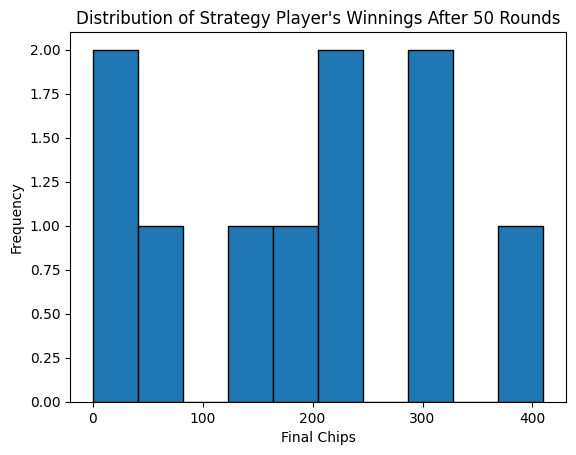

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def simulate_blackjack_games(num_games=100, rounds_per_game=50):
    starting_chips = 100  # Initial chips for the strategy player
    num_opponents = 3  # Number of opponents excluding dealer
    winnings = []  # Store final chips of strategy player for each game

    for _ in range(num_games):
        # Create a game instance
        game = BlackjackGame(
            num_players=num_opponents + 1,  # Includes strategy player
            starting_chips=starting_chips
        )

        # Play the game
        game.play_game(rounds=rounds_per_game)

        # Record the strategy player's final chips
        strategy_player_chips = game.players[0].chips
        winnings.append(strategy_player_chips)

    return winnings

# Simulate games
num_simulations = 10
winnings_list = simulate_blackjack_games(num_games=num_simulations)

# Analyze results
average_winnings = np.mean(winnings_list)
std_dev_winnings = np.std(winnings_list)
net_wins = sum(1 for w in winnings_list if w > 10)
net_losses = sum(1 for w in winnings_list if w < 10)
prob_net_win = net_wins / num_simulations
prob_net_loss = net_losses / num_simulations

# Print results
print(f"Average Winnings After 50 Rounds: {average_winnings}")
print(f"Standard Deviation of Winnings: {std_dev_winnings}")
print(f"Probability of Net Winning: {prob_net_win}")
print(f"Probability of Net Losing: {prob_net_loss}")

# Plot histogram
plt.hist(winnings_list, bins=10, edgecolor='black')
plt.title("Distribution of Strategy Player's Winnings After 50 Rounds")
plt.xlabel("Final Chips")
plt.ylabel("Frequency")
plt.show()


9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [42]:
import random
import numpy as np
import matplotlib.pyplot as plt

def simulate_games_for_threshold(threshold, num_games = 100, rounds_per_game=50, starting_chips=100):
    winnings = []
    for game_num in range(num_games):
        game = BlackjackGame(num_players=1, starting_chips = starting_chips)
        game.players[0].threshold = threshold

        for _ in range(rounds_per_game):
            if game.players[0].chips > 0:
                game.play_round()
            else:
                break

        winnings.append(game.players[0].chips)

    return winnings

threshold_values = [-6,-4,-2,0,2]
result = {}

for threshold in threshold_values:
    print(f"Simulating for threshold: {threshold}")
    winnings_list = simulate_games_for_threshold(threshold)

    # Store the results for each threshold
    avg_winnings = np.mean(winnings_list)
    std_winnings = np.std(winnings_list)
    net_wins = sum(1 for w in winnings_list if w > 100)
    net_losses = sum(1 for w in winnings_list if w < 100)
    prob_win = net_wins / len(winnings_list)
    prob_loss = net_losses / len(winnings_list)

    results[threshold] = {
        'avg_winnings': avg_winnings,
        'std_winnings': std_winnings,
        'prob_win': prob_win,
        'prob_loss': prob_loss
    }

    # Print results for this threshold
    print(f"Average Winnings: {avg_winnings}")
    print(f"Standard Deviation: {std_winnings}")
    print(f"Probability of Net Winning: {prob_win}")
    print(f"Probability of Net Losing: {prob_loss}")

thresholds = list(results.key())
avg_winnings = [result[t]['avg_winnings'] for t in thresholds]
std_winnings = [result[t]['std_winnings'] for t in thresholds]

plt.errorbar(thresholds, avg_winnings, yerr=std_winnings, fmt='-o', capsize=5, label='Avg Winnings')
plt.title('Average Winnings vs Threshold')
plt.xlabel('Threshold Value')
plt.ylabel('Average Winnings')
plt.grid(True)
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player, Hand: 7 of Spades, K of Hearts | Value: 17
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Player busted and loses.
Strategic Pla

AttributeError: 'dict' object has no attribute 'key'

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings.

In [ ]:
class AdaptiveRiskPlayer(Player):
    def __init__(self, name, starting_chips=100, verbose=True):
        super().__init__(name, is_computer=True, starting_chips=starting_chips, verbose=verbose)

    def decide(self):
        current_chip_ratio = self.chips / 100  # Compare current chips to starting chips
        hand_value = self.hand.hand_value()

        # Low chips, play aggressively (hit more often)
        if current_chip_ratio < 0.5:
            return 'hit' if hand_value < 17 else 'stand'

        # Moderate chips, play conservatively (hit until hand value is 17)
        elif current_chip_ratio < 1.5:
            return 'hit' if hand_value < 17 else 'stand'

        # High chips, protect the stack, be very conservative
        else:
            return 'stand' if hand_value >= 12 else 'hit'

# Adjust BlackjackGame to use this new strategy

class BlackjackGameWithAdaptiveRisk(BlackjackGame):
    def __init__(self, num_players=1, num_decks=1, starting_chips=100, verbose=True):
        self.deck = Deck(num_decks=num_decks)
        self.dealer = Player(name="Dealer", is_computer=True, verbose=verbose)

        # Use the new AdaptiveRiskPlayer instead of the strategic player
        self.players = [AdaptiveRiskPlayer(name="Adaptive Risk Player", starting_chips=starting_chips, verbose=verbose)]

        # Add opponents who follow the dealer's strategy
        self.opponents = [Player(name=f"Opponent {i + 1}", starting_chips=starting_chips, verbose=verbose) for i in range(3)]

        self.bet_amount = 10
        self.verbose = verbose
## Rest of the game code remains unchanged...


In [ ]:
def simulate_game_with_adaptive_risk(num_games=100, rounds_per_game=50, starting_chips=100):
    winnings_list = []

    for _ in range(num_games):
        game = BlackjackGameWithAdaptiveRisk(num_players=1, starting_chips=starting_chips)
        game.play_game(rounds=rounds_per_game)
        winnings_list.append(game.players[0].chips)  # Store final chips after game ends

    return winnings_list

def analyze_results(winnings_list):
    # Calculate statistics
    average_winnings = np.mean(winnings_list)
    std_winnings = np.std(winnings_list)
    net_wins = sum(1 for w in winnings_list if w > 100)  # Considering 100 as the starting chips
    net_losses = sum(1 for w in winnings_list if w < 100)
    total_games = len(winnings_list)

    prob_win = net_wins / total_games
    prob_loss = net_losses / total_games

    # Plot histogram of winnings
    plt.hist(winnings_list, bins=10, edgecolor='black')
    plt.title(f"Adaptive Risk Strategy - Distribution of Winnings After 50 Rounds")
    plt.xlabel('Final Chips')
    plt.ylabel('Frequency')
    plt.show()

    return average_winnings, std_winnings, prob_win, prob_loss

# Test the Adaptive Risk strategy
adaptive_risk_winnings = simulate_game_with_adaptive_risk()
avg_adaptive_risk, std_adaptive_risk, prob_win_adaptive, prob_loss_adaptive = analyze_results(adaptive_risk_winnings)

# Test the original Strategic Player strategy for comparison
strategic_winnings = simulate_game_with_threshold(-2)  # Example threshold for original strategy
avg_strategic, std_strategic, prob_win_strategic, prob_loss_strategic = analyze_results(strategic_winnings)

# Print comparison
print(f"Adaptive Risk Strategy Results:")
print(f"Average Winnings: {avg_adaptive_risk}")
print(f"Standard Deviation of Winnings: {std_adaptive_risk}")
print(f"Probability of Net Winning: {prob_win_adaptive}")
print(f"Probability of Net Losing: {prob_loss_adaptive}")

print("\nOriginal Strategic Player Results:")
print(f"Average Winnings: {avg_strategic}")
print(f"Standard Deviation of Winnings: {std_strategic}")
print(f"Probability of Net Winning: {prob_win_strategic}")
print(f"Probability of Net Losing: {prob_loss_strategic}")
